# Income Qualification Project ML

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing File
income_train=pd.read_csv('train.csv')
income_test=pd.read_csv('test.csv')

In [3]:
income_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
income_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
print(income_train.shape)
print(income_test.shape)

(9557, 143)
(23856, 142)


# Identify the output Varriable


# Understand the Type of Data

In [6]:
income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [7]:
income_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


# Check if there are any biases in your dataset.

In [8]:
#Counting values in the Target varriable.
income_train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

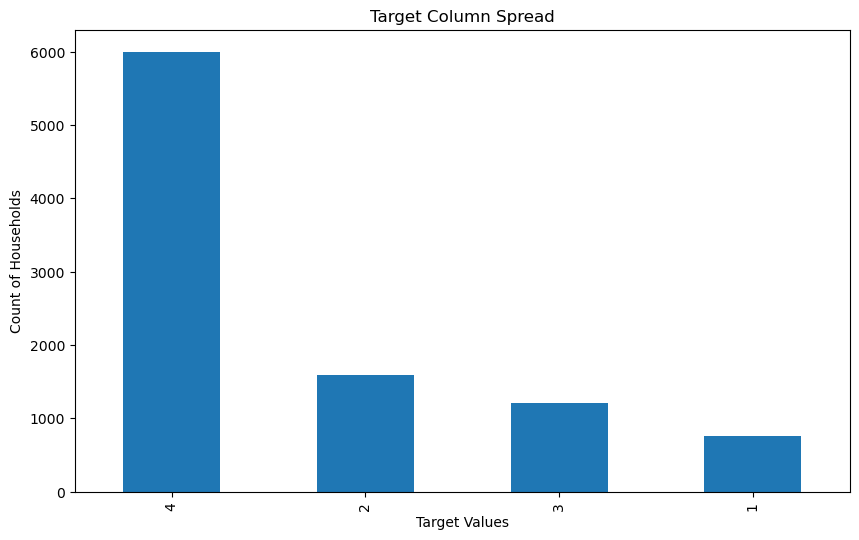

In [9]:
plt.figure(figsize=(10,6))
income_train['Target'].value_counts().plot.bar()

plt.xlabel("Target Values")
plt.ylabel("Count of Households")
plt.title("Target Column Spread")
plt.show()

In above output, we can see the extreme poverty has low count. 
So, we can infer that the dataset is biased.

# Check whether all members of the house have the same poverty level.

In [10]:
#Feature 'idhogar' identifies each household uniquely.
#So for the house analysis, this feature is used
equal_poverty= income_train.groupby('idhogar')['Target'].apply(lambda
                                                              x: (x.unique()==1).all())
print(equal_poverty)
unequal_poverty=equal_poverty[equal_poverty != True]
print('\n')
print(f"There are {len(unequal_poverty)} households, where family members has different level of poverty")

idhogar
001ff74ca    False
003123ec2    False
004616164    False
004983866    False
005905417    False
             ...  
ff9343a35    False
ff9d5ab17    False
ffae4a097    False
ffe90d46f     True
fff7d6be1    False
Name: Target, Length: 2988, dtype: bool


There are 2786 households, where family members has different level of poverty


# Check if there is a house without a family head

In [11]:
# parentesco1 feature infer if a  person is head of the family.
# so we will use this feature along with 'idhogar' feature
house_with_head=income_train.groupby('idhogar')['parentesco1'].sum()
house_without_head=house_with_head.loc[house_with_head ==0].index.tolist()
print(f"The  number of houses without family head is {len(house_without_head)}.")

The  number of houses without family head is 15.


# Set the poverty level of the members and the head of the house same in a family.

In [12]:
# Identify households with a head
house_with_head = income_train.groupby('idhogar')['parentesco1'].sum().loc[lambda x: x == 1].index.tolist()

# Select members with a family head
members_with_head = income_train.loc[income_train['idhogar'].isin(house_with_head)]

# Calculate the poverty level of each household
poverty_level_with_head = members_with_head.groupby('idhogar')['Target'].mean()

# Print the poverty level of households with a head
print('Poverty level of households with a head:\n{}'.format(poverty_level_with_head))

Poverty level of households with a head:
idhogar
001ff74ca    4.0
003123ec2    2.0
004616164    2.0
004983866    3.0
005905417    2.0
            ... 
ff9343a35    4.0
ff9d5ab17    4.0
ffae4a097    4.0
ffe90d46f    1.0
fff7d6be1    4.0
Name: Target, Length: 2973, dtype: float64


# Count how many null values are existing in columns.

In [13]:
#Analyzing int Features
income_train.select_dtypes('int64').head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,agesq,Target
0,0,3,0,1,1,0,0,1,1,0,...,1,0,43,100,1849,1,100,0,1849,4
1,0,4,0,1,1,1,0,1,1,0,...,1,0,67,144,4489,1,144,0,4489,4
2,0,8,0,1,1,0,0,0,0,0,...,1,0,92,121,8464,1,0,0,8464,4
3,0,5,0,1,1,1,0,2,2,1,...,1,0,17,81,289,16,121,4,289,4
4,0,5,0,1,1,1,0,2,2,1,...,1,0,37,121,1369,16,121,4,1369,4


In [14]:
#Finding Columns with null values in int features
null_counts_int=income_train.select_dtypes('int64').isnull().sum()
null_counts_int.value_counts()

0    130
dtype: int64

In [15]:
#Analyzing int Features
income_train.select_dtypes('float64').head(10)

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0
5,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0
6,180000.0,1.0,0.0,11.0,1.333333,1.777778,1.0,121.0
7,130000.0,NaN,0.0,10.0,4.000000,16.000000,1.0,100.0
8,130000.0,NaN,NaN,10.0,4.000000,16.000000,1.0,100.0
9,130000.0,NaN,NaN,10.0,4.000000,16.000000,1.0,100.0


In [16]:
#Finding Columns with null values in float features
null_counts_float=pd.DataFrame(income_train.select_dtypes('float64').isnull().sum())
print(null_counts_float.value_counts())

0       3
5       2
6860    1
7342    1
7928    1
dtype: int64


In [17]:
print(income_train.select_dtypes('float64').columns)

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


In [18]:
income_train[['v2a1', 'v18q1', 'rez_esc', 'dependency', 'edjefe', 'edjefa',
       'meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency',
       'SQBmeaned']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   v2a1             2697 non-null   float64
 1   v18q1            2215 non-null   float64
 2   rez_esc          1629 non-null   float64
 3   dependency       9557 non-null   object 
 4   edjefe           9557 non-null   object 
 5   edjefa           9557 non-null   object 
 6   meaneduc         9552 non-null   float64
 7   overcrowding     9557 non-null   float64
 8   SQBovercrowding  9557 non-null   float64
 9   SQBdependency    9557 non-null   float64
 10  SQBmeaned        9552 non-null   float64
dtypes: float64(8), object(3)
memory usage: 821.4+ KB


In [19]:
#Analyzing Object Features
income_train.select_dtypes('object').head(10)

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
5,ID_ec05b1a7b,2b58d945f,yes,11,no
6,ID_e9e0c1100,2b58d945f,yes,11,no
7,ID_3e04e571e,d6dae86b7,yes,9,no
8,ID_1284f8aad,d6dae86b7,yes,9,no
9,ID_51f52fdd2,d6dae86b7,yes,9,no


In [20]:
#Finding Columns with null values in Object features
null_counts_object=income_train.select_dtypes('object').isnull().sum()
null_counts_object.value_counts()

0    5
dtype: int64

#Note:
There are 0 null values in integer features
There are 0 null values in object features
There are 5 features has null values: 'v2a1', 'v18q1', 'rez_esc',  meaneduc & SQBmeaned .
Object Features dependency, edjefe adn edjefa have both string and int values.
    

# Removing null values rows of the target Varriable

There are no rows with null values for varriable Target. Hence, no action required.

# DATA CLEANING
dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe= years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

For these three variables, “yes” = 1 and “no” = 0. Lets correct these mixed varriables.

In [21]:
#Mapping mixed object varriables
map={'yes':1,'no':0}

for income in [income_train,income_test]:
    income['dependency']=income['dependency'].replace(map).astype(np.float64)
    income['edjefe']=income['edjefe'].replace(map).astype(np.float64)
    income['edjefa']=income['edjefa'].replace(map).astype(np.float64)
income_train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [22]:
income_train.columns[income_train.dtypes =='object']

Index(['Id', 'idhogar'], dtype='object')

In [23]:
#Understanding the releated features and their occurance
data=income_train[['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]
data.head()

,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [24]:
value_counts=lambda col: data[col].value_counts()
counts = pd.concat([value_counts(f'tipovivi{i}') for i in range(1,6)], axis=1)
print(counts)

   tipovivi1  tipovivi2  tipovivi3  tipovivi4  tipovivi5
1       5911        961       1736        163        786
0       3646       8596       7821       9394       8771


In [25]:
#From the data we know that majority of owns fully paid house, so no need to pay the rent
#Replacing Nan values of 'V2a1' with 0 Bollen response
income_train['v2a1']=income_train['v2a1'].fillna(value=0,inplace=True)
income_test['v2a1']=income_test['v2a1'].fillna(value=0,inplace=True)

In [26]:
#Understanding the releated features and their occurance
tablets=income_train[['v18q1','parentesco1']]
tablets.head()

,v18q1,parentesco1
0,NaN,1
1,1.0,1
2,NaN,1
3,1.0,0
4,1.0,0


In [27]:
tablets.groupby('parentesco1')['v18q1'].count()

parentesco1
0    1560
1     655
Name: v18q1, dtype: int64

In [28]:
#We can see majority of household doesn't own the tablets.
#so, lets replace the v18q1 nan values to 0 .
income_train['v18q1']=income_train['v18q1'].fillna(value=0,inplace=True)
income_test['v18q1']=income_test['v18q1'].fillna(value=0,inplace=True)

In [29]:
income_train['rez_esc'].value_counts()

0.0    1211
1.0     227
2.0      98
3.0      55
4.0      29
5.0       9
Name: rez_esc, dtype: int64

In [30]:
#Since mostly the value is 0 for rez_esc feature, lets replace NaN values with 0 as well
income_train['rez_esc']=income_train['rez_esc'].fillna(value=0,inplace=True)
income_test['rez_esc']=income_test['rez_esc'].fillna(value=0,inplace=True)

In [31]:
income_train[['meaneduc', 'SQBmeaned']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   meaneduc   9552 non-null   float64
 1   SQBmeaned  9552 non-null   float64
dtypes: float64(2)
memory usage: 149.5 KB


In [32]:
#Since we have only 5 missing data out of 9552 for meaneduc & SQBmeaned, lets drop them
income_train.dropna(subset=['meaneduc', 'SQBmeaned'], inplace=True)
income_test.dropna(subset=['meaneduc', 'SQBmeaned'], inplace=True)

In [33]:
#Dropping Squared Varriables which doesn't add value to classification model.
#SQBescolari, SQBage, SQBhogar_total, SQBedjefe, SQBhogar_nin, SQBovercrowding, SQBdependency, SQBmeaned, agesq
income_train.drop(columns=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'],
                 inplace=True)
income_test.drop(columns=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'],
                 inplace=True)

In [34]:
income_train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6', 'area1',
       'area2', 'age', 'Target'],
      dtype='object', length=134)

In [35]:
#Check for redundant household variable
id_ = ['Id', 'idhogar', 'Target']

ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

ind_ordered = ['rez_esc', 'escolari', 'age']

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [36]:
head= income_train.loc[income_train['parentesco1']==1,:]
head= head[id_ +hh_bool +hh_cont+hh_ordered]
head.shape

(2970, 98)

In [37]:
# Create correlation matrix
corr_matrix = head.corr()

# Select upper triangle of correlation matrix; excluding corr with itself & redundant features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

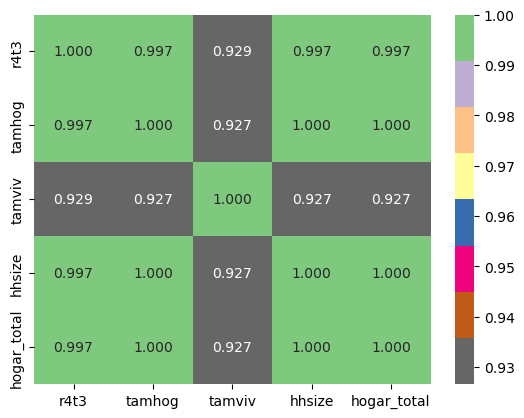

In [38]:
import seaborn as sns
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

Note

These variables are strongly interrelated with each other: the total number of people in the household (tamhog), the household size (tamviv), the number of individuals living in the household (hhsize), and the total number of individuals in the household (hogar_total) exhibit a high degree of correlation.

In [39]:
#Dropping 'tamhog', 'hogar_total', 'r4t3'
income_train.drop(columns=['tamhog', 'hogar_total', 'r4t3'],inplace=True)
income_test.drop(columns=['tamhog', 'hogar_total', 'r4t3'],inplace=True)
income_train.shape

(9552, 131)

In [40]:
#check for redundant individual redundant varriable
ind =income_train[id_ + ind_bool +ind_ordered]
ind.shape

(9552, 39)

In [41]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype('bool'))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

In [42]:
income_train.drop(columns='female',inplace=True)
income_test.drop(columns='female',inplace=True)
income_train.shape

(9552, 130)

In [43]:
#Checking area1 & area2, we find that area2 is redundant as we have column indicating the house at urban zone
income_train.drop(columns = 'area2',inplace=True)
income_test.drop(columns = 'area2',inplace=True)
income_train.shape

(9552, 129)

In [44]:
#finally droping 'Id' & 'Idhogar' as they are uniue identifier  in the data set
income_train.drop(columns = ['Id','idhogar'],inplace=True)
income_test.drop(columns = ['Id','idhogar'],inplace=True)
income_train.shape

(9552, 127)

In [45]:
income_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 127 entries, v2a1 to Target
dtypes: float64(5), int64(119), object(3)
memory usage: 9.3+ MB


In [46]:
# Still there are some object items shown in the dataframe which can't be read in ML
#Lets find out these object and convert them to int
income_train.columns[income_train.dtypes =='object']

Index(['v2a1', 'v18q1', 'rez_esc'], dtype='object')

Note: 
If we look into the income_train dataframe, these features consist of 'None' values instead of 0 values. Let's convert these to 0.

In [47]:
income_train[['v2a1', 'v18q1', 'rez_esc']] = income_train[['v2a1', 'v18q1', 'rez_esc']]\
.replace('None', np.nan).fillna(0).astype(int)
income_test[['v2a1', 'v18q1', 'rez_esc']] = income_test[['v2a1', 'v18q1', 'rez_esc']]\
.replace('None', np.nan).fillna(0).astype(int)

# Predict the accuracy using random forest classifier.

In [48]:
X=income_train.iloc[:,0:-1] # Training features
X

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age
0,0,0,3,0,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,1,43
1,0,0,4,0,1,1,1,0,0,1,...,1,1,1,0,0,0,0,0,1,67
2,0,0,8,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,92
3,0,0,5,0,1,1,1,0,0,2,...,1,3,1,0,0,0,0,0,1,17
4,0,0,5,0,1,1,1,0,0,2,...,1,3,1,0,0,0,0,0,1,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,0,0,6,0,1,1,0,0,0,2,...,1,3,0,0,0,0,0,1,0,46
9553,0,0,6,0,1,1,0,0,0,2,...,1,3,0,0,0,0,0,1,0,2
9554,0,0,6,0,1,1,0,0,0,2,...,1,3,0,0,0,0,0,1,0,50
9555,0,0,6,0,1,1,0,0,0,2,...,1,3,0,0,0,0,0,1,0,26


In [49]:
y=income_train.iloc[:,-1]# Target Variable
y

0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9552, dtype: int64

In [50]:
print(X.shape)
print(y.shape)

(9552, 126)
(9552,)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
#instantiating the Random Forest Classifier
rfc=RandomForestClassifier()

In [52]:
#fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
#Predicting the y_pred test
y_predict= rfc.predict(X_test)

In [54]:
#checking accuracy score, confusion matric and classification report on test data
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9023028611304955
[[ 170   12    0   34]
 [  14  384   16   84]
 [   0   18  259   94]
 [   0    3    5 1773]]
              precision    recall  f1-score   support

           1       0.92      0.79      0.85       216
           2       0.92      0.77      0.84       498
           3       0.93      0.70      0.80       371
           4       0.89      1.00      0.94      1781

    accuracy                           0.90      2866
   macro avg       0.92      0.81      0.86      2866
weighted avg       0.90      0.90      0.90      2866



In [55]:
print(income_test.shape)
print(income_train.shape)

(23825, 126)
(9552, 127)


In [56]:
y_predict_testincome=rfc.predict(income_test)

In [57]:
y_predict_testincome

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

# Check the accuracy using random forest with cross validation

In [58]:
#Importing Kfold and cross validation score
from sklearn.model_selection import KFold,cross_val_score

In [59]:
#Defining cross validation generator and calculating cross_val_score
seed=42
kfold=KFold(n_splits=5,random_state=seed,shuffle=True)

rfc=RandomForestClassifier(random_state=10,n_jobs=-1)
print(f"The cross_val_scores are :\
{cross_val_score(rfc,X,y,cv=kfold,scoring='accuracy')}")

#Mean of cross_val_score
results=cross_val_score(rfc,X,y,cv=kfold,scoring='accuracy')
print(f'The mean of cross_val_score is {results.mean()}')


The cross_val_scores are :[0.92098378 0.92098378 0.92460733 0.93141361 0.93350785]
The mean of cross_val_score is 0.9262992704129578


Note: The mean of cross val scores is 0.9262992704129578. This mean score represents the overall accuracy of the model based on the 5-fold cross-validation. 